dataset:
https://www.kaggle.com/datasets/shashwatwork/web-page-phishing-detection-dataset

### 1. import the dataset and libraries 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)


raw_dataset = pd.read_csv(path)

### 2. inspect the dataset

In [3]:
raw_dataset.shape

(11430, 89)

In [4]:
raw_dataset.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


* outliers at max values: nb_dots, nb_hyphens, nb_at, nb_qm, nb_and,nb_eq, domain_registration_length, domain_age
* target = legitimate/phishing

In [5]:
pd.set_option('display.max_rows', 500)
raw_dataset.isna().sum()
# no missing values

url                           0
length_url                    0
length_hostname               0
ip                            0
nb_dots                       0
nb_hyphens                    0
nb_at                         0
nb_qm                         0
nb_and                        0
nb_or                         0
nb_eq                         0
nb_underscore                 0
nb_tilde                      0
nb_percent                    0
nb_slash                      0
nb_star                       0
nb_colon                      0
nb_comma                      0
nb_semicolumn                 0
nb_dollar                     0
nb_space                      0
nb_www                        0
nb_com                        0
nb_dslash                     0
http_in_path                  0
https_token                   0
ratio_digits_url              0
ratio_digits_host             0
punycode                      0
port                          0
tld_in_path                   0
tld_in_s

In [6]:
pd.reset_option('display.max_rows')

In [7]:
original_dataset = raw_dataset.copy()

##### 2.1 inspect correlation and determine important features

In [8]:
class_map = {'legitimate':0, 'phishing':1}
original_dataset['status'] = original_dataset['status'].map(class_map)

In [9]:
corr_matrix = original_dataset.corr()

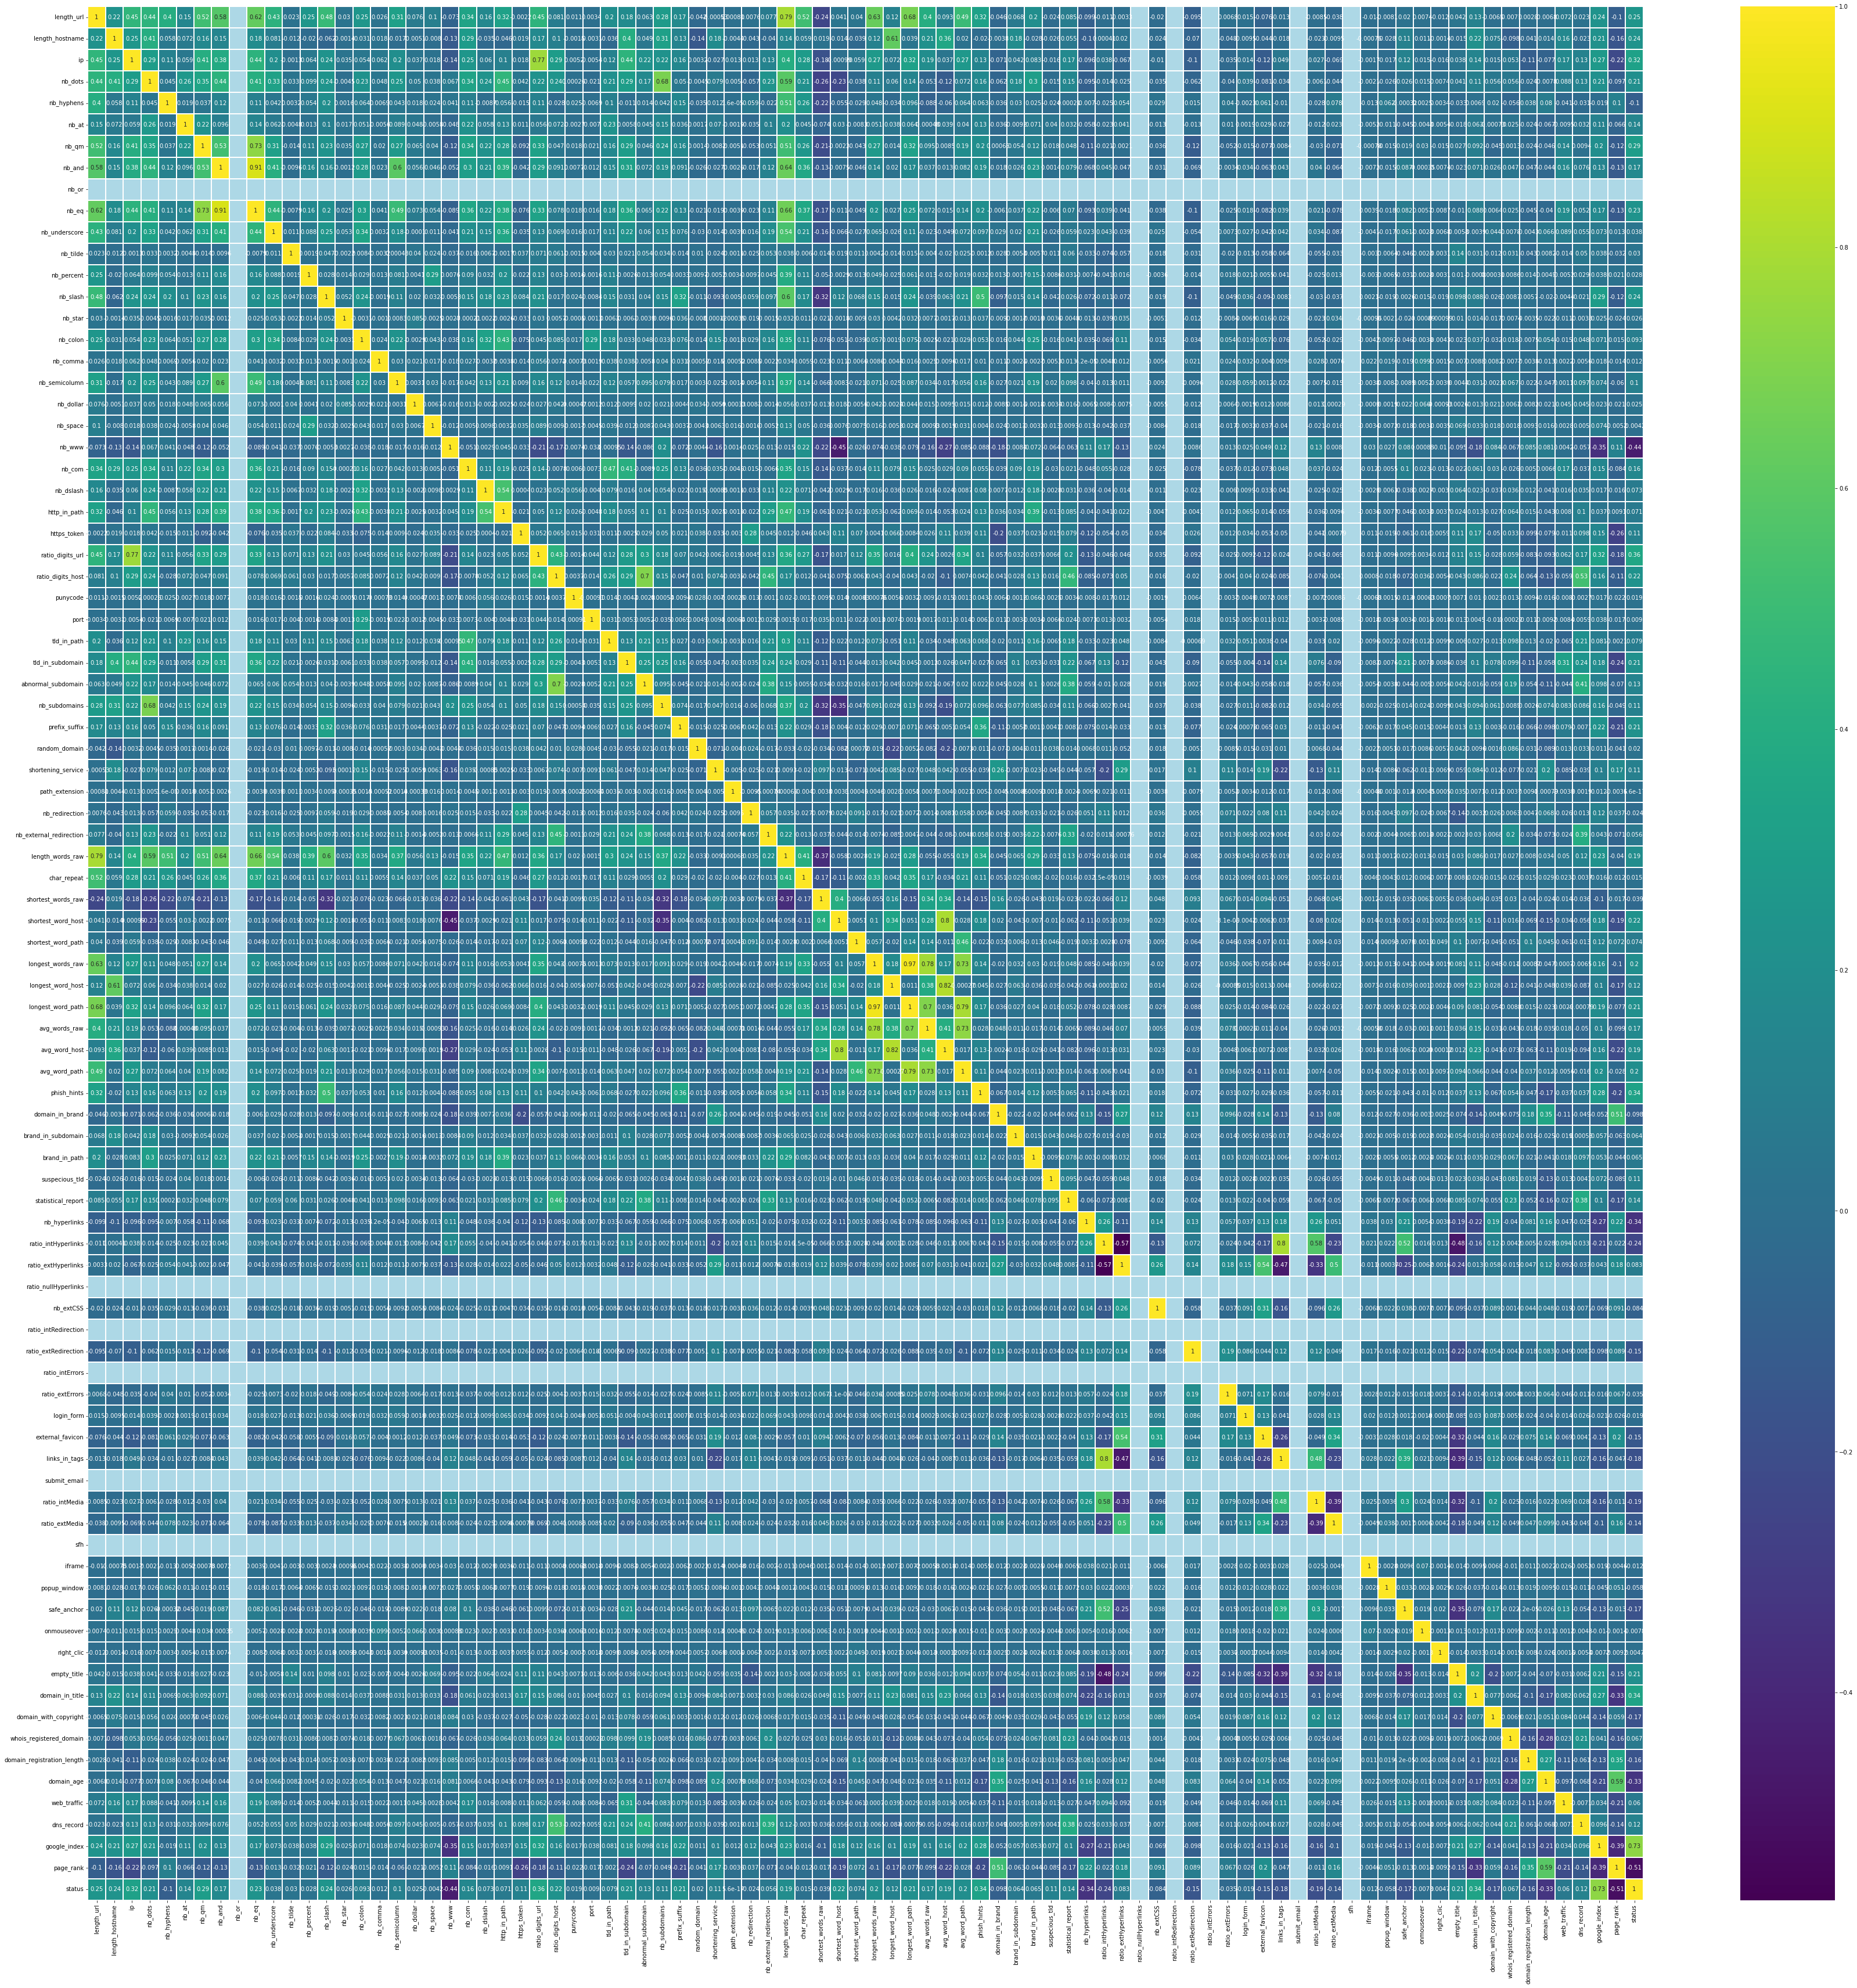

In [10]:
plt.figure(figsize=(60,60))
color = plt.get_cmap('viridis').copy()   # default color
color.set_bad('lightblue') 
sns.heatmap(corr_matrix, annot=True, linewidth=0.4, cmap=color)
plt.savefig('heatmap')
plt.show()

In [11]:
corr_matrix.shape

(88, 88)

In [12]:
corr_matrix['status']
#same as corr_matrix.iloc[[87]].T
# last column and last row are the same

length_url         0.248580
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens        -0.100107
                     ...   
web_traffic        0.060388
dns_record         0.122119
google_index       0.731171
page_rank         -0.511137
status             1.000000
Name: status, Length: 88, dtype: float64

In [13]:
status_corr = corr_matrix['status']
status_corr.shape

(88,)

In [14]:
def feature_selector_correlation(cmatrix, threshold):
    
    selected_features = []
    feature_score = []
    i=0
    for score in cmatrix:
        if abs(score)>threshold:
            selected_features.append(cmatrix.index[i])
            feature_score.append( ['{:3f}'.format(score)])
        i+=1
    result = list(zip(selected_features,feature_score)) 
    return result

In [15]:
features_selected = feature_selector_correlation(status_corr, 0.2)
features_selected

[('length_url', ['0.248580']),
 ('length_hostname', ['0.238322']),
 ('ip', ['0.321698']),
 ('nb_dots', ['0.207029']),
 ('nb_qm', ['0.294319']),
 ('nb_eq', ['0.233386']),
 ('nb_slash', ['0.242270']),
 ('nb_www', ['-0.443468']),
 ('ratio_digits_url', ['0.356395']),
 ('ratio_digits_host', ['0.224335']),
 ('tld_in_subdomain', ['0.208884']),
 ('prefix_suffix', ['0.214681']),
 ('shortest_word_host', ['0.223084']),
 ('longest_words_raw', ['0.200147']),
 ('longest_word_path', ['0.212709']),
 ('phish_hints', ['0.335393']),
 ('nb_hyperlinks', ['-0.342628']),
 ('ratio_intHyperlinks', ['-0.243982']),
 ('empty_title', ['0.207043']),
 ('domain_in_title', ['0.342807']),
 ('domain_age', ['-0.331889']),
 ('google_index', ['0.731171']),
 ('page_rank', ['-0.511137']),
 ('status', ['1.000000'])]

### 3. Preprocessing

#### 3.1 setup predictors and targets

In [16]:
selected_features = [i for (i,j) in features_selected if i != 'status']
selected_features

['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_qm',
 'nb_eq',
 'nb_slash',
 'nb_www',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'prefix_suffix',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_path',
 'phish_hints',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'empty_title',
 'domain_in_title',
 'domain_age',
 'google_index',
 'page_rank']

In [17]:
X_selected = original_dataset[selected_features]
X_selected

,length_url,length_hostname,ip,nb_dots,nb_qm,nb_eq,nb_slash,nb_www,ratio_digits_url,ratio_digits_host,...,longest_words_raw,longest_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,empty_title,domain_in_title,domain_age,google_index,page_rank
0,37,19,0,3,0,0,3,1,0.000000,0.000000,...,11,6,0,17,0.529412,0,0,-1,1,4
1,77,23,1,1,0,0,5,0,0.220779,0.000000,...,32,32,0,30,0.966667,0,1,5767,1,2
2,126,50,1,4,1,3,5,0,0.150794,0.000000,...,17,17,0,4,1.000000,0,1,4004,1,0
3,18,11,0,2,0,0,2,0,0.000000,0.000000,...,5,0,0,149,0.973154,0,1,-1,0,3
4,55,15,0,2,0,0,5,1,0.000000,0.000000,...,11,11,0,102,0.470588,0,0,8175,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,4,1,0.000000,0.000000,...,11,11,0,199,0.884422,0,0,5396,0,6
11426,84,18,0,5,1,1,5,1,0.023810,0.000000,...,10,8,0,3,1.000000,0,1,6728,1,0
11427,105,16,1,2,1,1,5,1,0.142857,0.000000,...,15,15,0,68,0.470588,0,0,8515,1,10
11428,38,30,0,2,0,0,3,1,0.000000,0.000000,...,22,0,0,32,0.375000,0,1,2836,0,4


In [18]:
X_selected.shape

(11430, 23)

In [19]:
y = original_dataset['status']
y

0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

#### 3.2 train test split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle = True)

### 4. model fitting

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
model_random_forest = RandomForestClassifier(n_estimators=350,
                                             random_state=42,
                                            )

In [24]:
model_random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=350, random_state=42)

In [25]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

def custom_accuracy_set (model, X_train, X_test, y_train, y_test, train=True):
    
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    
    
    if train:
        x = X_train
        y = y_train
    elif not train:
        x = X_test
        y = y_test
        
    y_predicted = model.predict(x)
    
    accuracy = accuracy_score(y, y_predicted)
    print('model accuracy: {0:4f}'.format(accuracy))
    oconfusion_matrix = confusion_matrix(y, y_predicted)
    print('Confusion matrix: \n {}'.format(oconfusion_matrix))
    oroc_auc_score = lb.transform(y), lb.transform(y_predicted)

### 5. evaluating accuracy

In [26]:
# train accuracy

custom_accuracy_set(model_random_forest, X_train, X_test, y_train, y_test, train=True)

model accuracy: 1.000000
Confusion matrix: 
 [[4558    0]
 [   0 4586]]


In [27]:
# test accuracy

custom_accuracy_set(model_random_forest, X_train, X_test, y_train, y_test, train=False)

model accuracy: 0.965004
Confusion matrix: 
 [[1118   39]
 [  41 1088]]


### 6. export the model

In [28]:
import pickle

with open('model_phishing_webpage_classifer','wb') as file:
    pickle.dump(model_random_forest,file)